# Indeterminate Beam calculator

### Table of Contents
1. Initialisation
2. Detailed Examples
3. Statically determinate beam (Ex 12.14 Hibbeler)
4. Statically Indeterminate beam (Ex 12.21 Hibbeler)
5. Spring supported beam deflection (Ex 12.16 Hibbeler)
6. Axial Loaded Indeterminate Beam (Ex 4.13 Hibbeler)
7. Arbitrary README.md example

Note:
You must always run the initialization cell first. 
Then you are free to move to any of the other sections as per the table of contents.

 ## 1. INITIALIZATION


In [1]:
##RUN THIS CELL FIRST TO INITIALISE THE NOTEBOOK!!!!
#!pip install indeterminatebeam
%matplotlib inline
from indeterminatebeam import Beam, Support, DistributedLoadH, DistributedLoadV, PointLoadH, PointLoadV, PointTorque, PointLoad, TrapezoidalLoad


## 2. DETAILED EXAMPLE

In [2]:
##intialise a beam object
beam_1 = Beam(5)                   ##intialises a 5m long beam (assuming E = 2*10**5 MPa, I = 6*10**7 mm4 )
beam_2 = Beam(5, E=30000, I=50*10 **6)   ##intialises a 5m long beam assigning E and I.

##create support objects
a = Support(0,(1,1,1))      ##defines a fixed support at point 0m point
b = Support(2,(0,1,0))      ##defines a roller support restaint only in the y direction at 2m point
c = Support(5,(1,1,0))      ##defines pinned support at 5m point

##add supports to beam object
beam_1.add_supports(a,b,c)        ##create a statically indeterminate beam
beam_2.add_supports(a,b,c)        ##intially create as a statically indeterminate beam
beam_2.remove_supports(a)         ##remove support a to make beam statically determinate

##create load objects
load_1 = PointLoad(1,3,45)            ##create a point load of force 1kn acting at 3m point on beam, inclined at 45 degrees to horizontal. 
load_2 = DistributedLoadV(2,(0,1))    ##create a 2KN/m UDL from 0m to 1m point
load_3 = PointTorque(3,4)             ##assign a point torque of 3kN.m at 4m point
load_4 = TrapezoidalLoad((-1,-5),(2,4))

##add load objects to beams
beam_1.add_loads(load_1,)                    ##add load_1 object to beam 1
beam_1.add_loads(load_2,load_3,load_4)              ##add load_2 and load_3 object to beam 1
beam_2.add_loads(load_1, load_2, load_3)     ##add load_1, load_2, load_3 object to beam 2
beam_2.remove_loads(load_2)                  ##remove load 2 object from beam 2

##compute solutions for beams
beam_1.analyse()                             ##now that beam is all set up can solve for external and internal forces
beam_2.analyse()                                


In [3]:
##get determinancy of beams
det_1 = beam_1.check_determinancy()
det_2 = beam_2.check_determinancy()
print("The Beam determinancy is below")
print(f"beam_1 has a determinancy: {det_1}")
print(f"beam_2 has a determinancy: {det_2}")

The Beam determinancy is below
beam_1 has a determinancy: 3
beam_2 has a determinancy: 0


In [4]:
#get info on the supports for a beam
beam_1.get_support_details()

There are 3 supports:

--------------------------------
        id = 1
        position = 0.0
        Stiffness_x = oo
        Stiffness_y = oo
        Stiffness_M = oo 

--------------------------------
        id = 2
        position = 2.0
        Stiffness_x = 0
        Stiffness_y = oo
        Stiffness_M = 0 

--------------------------------
        id = 3
        position = 5.0
        Stiffness_x = oo
        Stiffness_y = oo
        Stiffness_M = 0 



In [28]:
##query for the data at a specfic point
print("bending moments at 3m: " + str(beam_1.get_bending_moment(3)))
print("shear forces at 1,2,3,4,5m points: " + str(beam_1.get_shear_force(1,2,3,4,5)))
print("normal force absolute max: " + str(beam_1.get_normal_force(return_absmax=True)))
print("deflection max: " + str(beam_1.get_deflection(return_max = True)))


bending moments at 3m: [1.724]
shear forces at 1,2,3,4,5m points: [-1.499, 4.848, 3.555, -0.445, 0.0]
normal force absolute max: 0.424
deflection max: 0.221


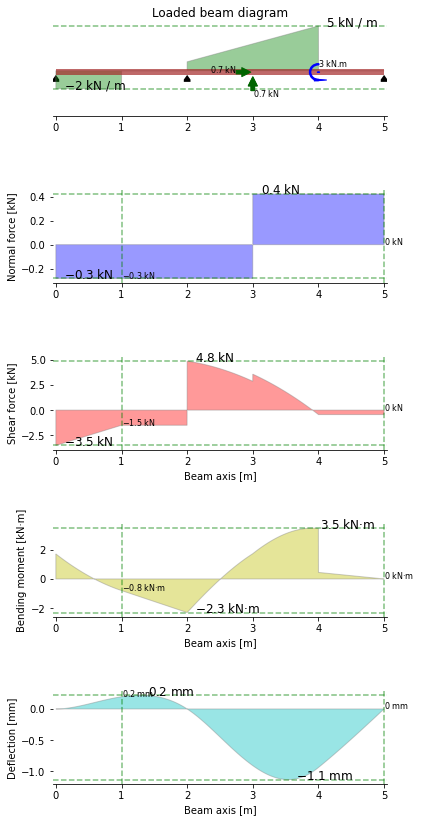

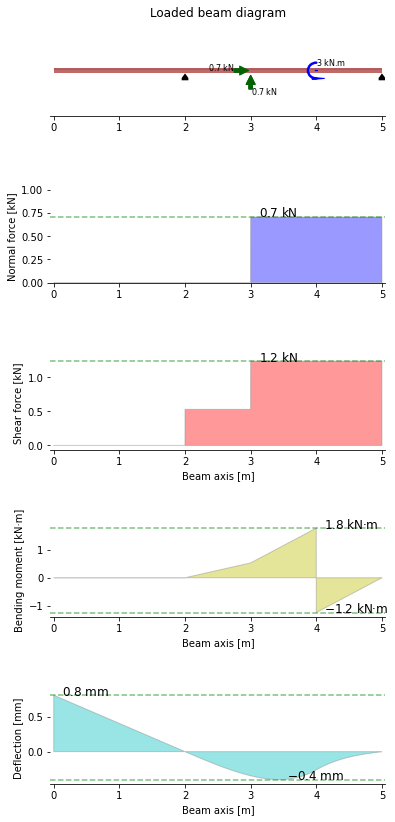

In [5]:
##add a query point to a plot (adds values on plot)
beam_1.add_query_points(1,3,5)
beam_1.remove_query_points(5)

## plot the results for the beam and save them as a pdf
fig_1 = beam_1.plot()
fig_2 = beam_2.plot()

##save the results as a pdf (optional)
#fig_1.savefig("./results.pdf")


## 3. STATICALLY DETERMINATE BEAM (Ex 12.14 Hibbeler)

Deflection is -244.8 kN.m3 / EI 


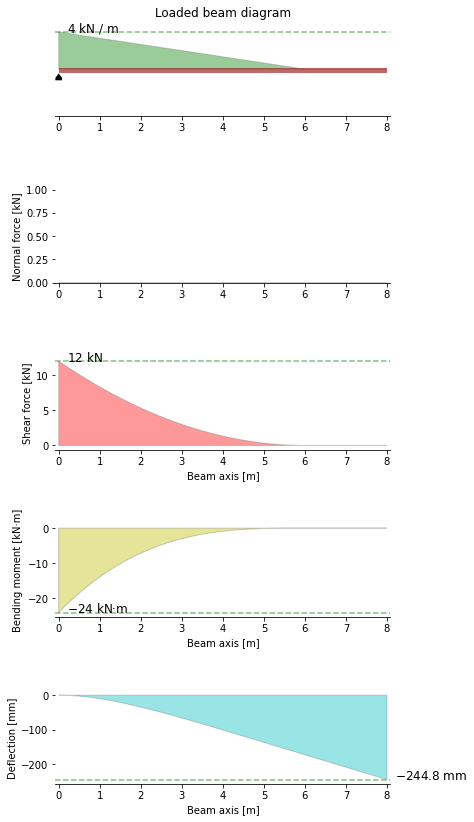

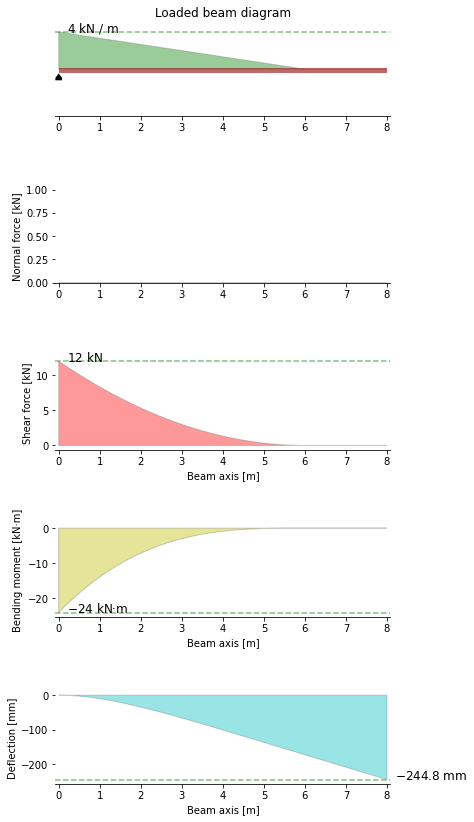

In [13]:
## Statically Determinate beam (Ex 12.14 Hibbeler)
## Determine the reactions at the roller support B of the beam described below: 
## 3m long, fixed at A (x = 0m), roller support at B (x=3m), vertical point load at midpan of 8kN, UDL of 6kN/m, EI constant.

beam = Beam(8, E=1, I = 10**12)     ##EI Defined to be 1 kN.m2 to get the deflection as a function of EI

a = Support(0, (1,1,1))             ##explicitly stated although this is equivalent to Support() as the defaults are for a cantilever on the left of the beam.

load_1 = TrapezoidalLoad((-4,0),(0,6))

beam.add_supports(a)
beam.add_loads(load_1)

beam.analyse()
print(f"Deflection is {beam.get_deflection(8)[0]} kN.m3 / EI ")

beam.plot()  ##all plots are correct, deflection graph shape is correct but for actual deflection values will need real EI properties.


## 4. STATICALLY INDETERMINATE BEAM (Ex 12.21 Hibbeler)

[0, 9.25, 0]


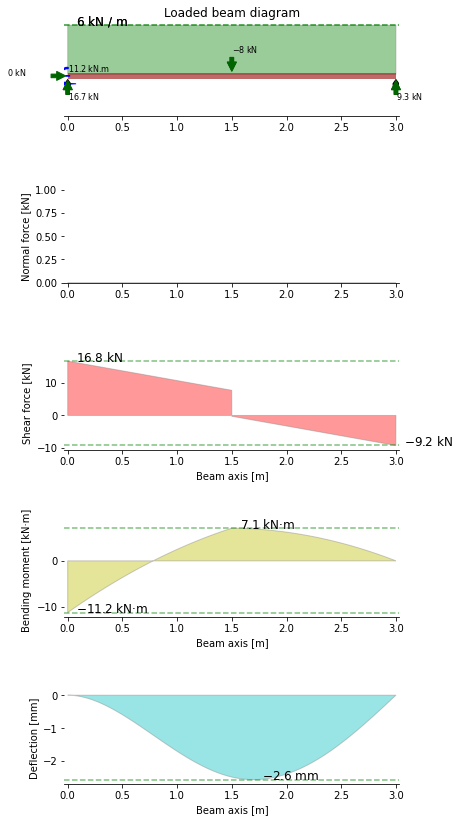

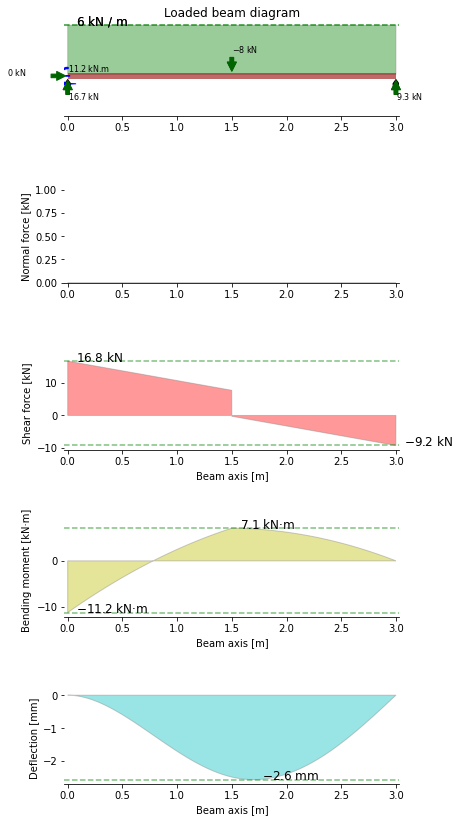

In [4]:
## Statically Indeterminate beam (Ex 12.21 Hibbeler)
## Determine the reactions at the roller support B of the beam described below: 
## 3m long, fixed at A (x = 0m), roller support at B (x=3m), vertical point load at midpan of 8kN, UDL of 6kN/m, EI constant.

beam = Beam(3)

a = Support(0,(1,1,1))  
b = Support(3,(0,1,0))

load_1 = PointLoadV(-8,1.5)
load_2 = DistributedLoadV(-6, (0,3))

beam.add_supports(a,b)
beam.add_loads(load_1,load_2)

beam.analyse()
print(beam.reactions[3])  ##returns a list of reaction forces in the form ['x','y','z']

beam.plot(draw_reactions=True)

## 5. SPRING SUPPORTED BEAM (Ex 12.16 Hibbeler)

In [ ]:
## Spring Supported beam (Ex 12.16 Hibbeler)
## Determine the vertical displacement at x = 1m for the beam detailed below:
## 3m long, spring of ky = 45kN/m at A (x = 0 m) and B (x = 3 m), vertical point load at x = 1m of 3 kN, E = 200GPa, I = 4.6875*10**-6 m4.

##NOTE: BEWARE OF UNITS

##when initializing beam we should specify E and I. Units should be expressed in MPa (N/mm2) for E, and mm4 for I
beam = Beam(3, E=(200)*10**3, I=(4.6875*10**-6)*10**12)

##creating supports, note that an x support must be specified even when there are no x forces. This will not affect the accuracy or reliability of results.
##Also note that ky units are kN/m in the problem but must be in kN/mm for the program to work correctly.
a = Support(0, (1,1,0), ky = 45*10**-3)   
b = Support(3, (0,1,0), ky = 45*10**-3)

load_1 = PointLoadV(-3,1)

beam.add_supports(a,b)
beam.add_loads(load_1)

beam.analyse()

beam.get_deflection(1)
beam.plot(draw_reactions=True)

##results in 38.46 mm deflection ~= 38.4mm specified in textbook (difference only due to their rounding)
##can easily check reliability of answer by looking at deflection at the spring supports. Should equal F/k.
## ie at support A (x = 0 m), the reaction force is 2kN by equilibrium, so our deflection is F/K = 2kn / 45*10-3 kN/mm = 44.4 mm (can be seen in plot)

## 6. AXIAL LOADED INDETERMINATE BEAM (Ex 4.13 Hibbeler)

{0: [45.0, 0.0, 0.0], 0.4: [15.0, 0.0, 0.0]}

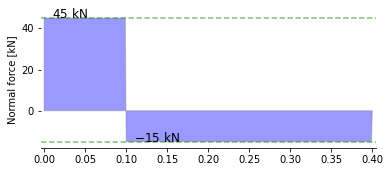

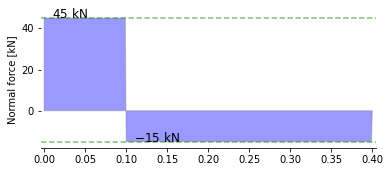

In [16]:
##AXIAL LOADED INDETERMINATE BEAM (Ex 4.13 Hibbeler)
## A rod with constant EA has a force of 60kN applied at x =0.1, and the beam has fixed supports at x=0, and x =0.4. Determine the reactino forces.

beam = Beam(0.4)

a = Support()
b = Support(0.4)

load_1 = PointLoadH(-60, 0.1)

beam.add_supports(a,b)
beam.add_loads(load_1)

beam.analyse()
beam.plot_normal_force()


## 7. Arbitrary README.md example

In [ ]:
##arbritrary example defined in README.md
from indeterminatebeam import Beam, Support, PointLoadV, PointTorque, DistributedLoadV
beam = Beam(7)                          # Initialize a Beam object of length 9m with E and I as defaults
beam_2 = Beam(9,E=2000, I =100000) 

a = Support(5,(1,1,0))                  # Defines a pin support at location x = 5m  
b = Support(0,(0,1,0))                  # Defines a roller support at location x = 0m
c = Support(7,(1,1,1))
beam.add_supports(a,b,c)    

load_1 = PointLoadV(1,2)                 # Defines a point load of 1kn acting up, at location x = 2m
load_2 = DistributedLoadV(2,(1,4))      # Defines a 2kN UDL from location x = 1m to x = 4m 
load_3 = PointTorque(2, 3.5)            # Defines a 2kN.m point torque at location x = 3.5m
beam.add_loads(load_1,load_2,load_3)    # Assign the support objects to a beam object created earlier

beam.analyse()                        

fig = beam.plot()
#fig.savefig("./readme_example.png")

You can now go back up and continue to play around choosing different loads, beam lengths and placement of the beam supports.
Add as many loads as you want to the list.

After you have made some changes, run the code cell again to calculate your new results.

When you are comfortable with that, check what happens if you try more interesting expressions for the distributed loads, for example:

```python
DistributedLoadV("2 * x**2 + cos(5)", (0, 3))
```
By the way, a double asterisk is how you write a power in Python: ```"2 * x**2 + cos(5)"``` means $2x^2 + \cos(5)$

**Note:** you can also try to include trigonometric functions, but in this case the whole mathematical expression __must be surrounded by quotation marks__, just as in the example above.

More examples have been included below.